<a href="https://colab.research.google.com/github/2025-01-sookmyung-opensource/final_project/blob/pre-yoon/final_03____20____yolov11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Roboflow 에서 데이터셋 가져오기 (20종) -> api key 는 마스킹
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9")
project = rf.workspace("yoon-pvmwt").project("opensource_final_yoon")
version = project.version(5)
dataset = version.download("yolov11")

Train 이미지 개수: 2808
첫 5개 파일명: ['grilledmackerel_039_jpg.rf.1865414f20c6db0d18cd4c54bd1bf40a.jpg', 'chickensteak_090_jpg.rf.8d7503fb5a760c68040f02357098ea6e.jpg', 'tunasandwich_078_jpg.rf.b915236f70444953a180ba81ccf6e66f.jpg', 'steamedrice_075_jpg.rf.139ed729375bb809ec7a9bad698e7ae1.jpg', 'roastedsweetpotato_031_jpg.rf.70132e3d7fc25883b09ceba1f1fac318.jpg']


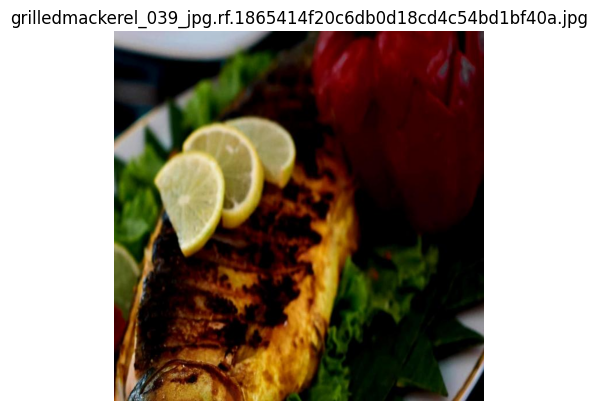

In [ ]:
# 데이터셋 내부 train 이미지 확인
import os
from PIL import Image
import matplotlib.pyplot as plt

image_dir = os.path.join(dataset.location, "train", "images")
image_files = os.listdir(image_dir)

print(f"Train 이미지 개수: {len(image_files)}")
print(f"첫 5개 파일명: {image_files[:5]}")

# 첫번째 이미지 시각화
img_path = os.path.join(image_dir, image_files[0])
img = Image.open(img_path)
plt.imshow(img)
plt.title(image_files[0])
plt.axis('off')
plt.show()

In [ ]:
data_yaml = """
train: /content/opensource_final_yoon-1/train/images
val: /content/opensource_final_yoon-1/valid/images

nc: 20
names:
  - steamedrice (0)
  - japchae
  - eeldonburi
  - jjajangmyeon
  - tunasandwich
  - chickensteak
  - coldsoymilknoodles
  - pasta
  - grilledribs
  - bakedpotato
  - crabstick
  - grilledmackerel
  - noodles
  - roastedsweetpotato
  - mungbeansprouts
  - scrambledegg
  - spinach
  - kimchistew
  - bibimbap
  - marinatedcrab
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml 생성 완료!")

data.yaml 생성 완료!


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # pretrained 모델 로드

model.train(
    data='data.yaml',
    epochs=100,
    batch=16,
    imgsz=640,
    augment=True,
    project='runs/train',
    name='yolov11n_food',
)

특이사항 : yolov8 을 다운받으려 했으나 자동으로 11버전이 다운됨. 아래 로그 참고

AMP: running Automatic Mixed Precision (AMP) checks...
Downloading https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt to 'yolo11n.pt'...
100%|██████████| 5.35M/5.35M [00:00<00:00, 152MB/s]

Saving 오소프_식단_03.png to 오소프_식단_03.png
Saving 오소프_식단_02.png to 오소프_식단_02.png
Saving 오소프_식단_01.png to 오소프_식단_01 (4).png
이미지 파일: 오소프_식단_03.png

image 1/1 /content/오소프_식단_03.png: 256x640 (no detections), 38.5ms
Speed: 1.9ms preprocess, 38.5ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)
탐지된 음식 종류 및 개수 : {}


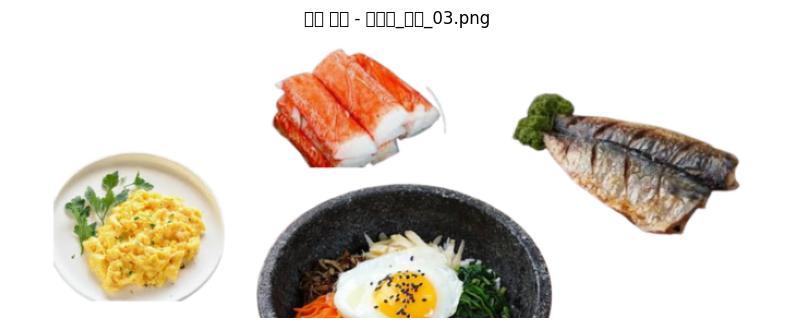

이미지 파일: 오소프_식단_02.png

image 1/1 /content/오소프_식단_02.png: 512x640 (no detections), 52.4ms
Speed: 3.1ms preprocess, 52.4ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)
탐지된 음식 종류 및 개수 : {}


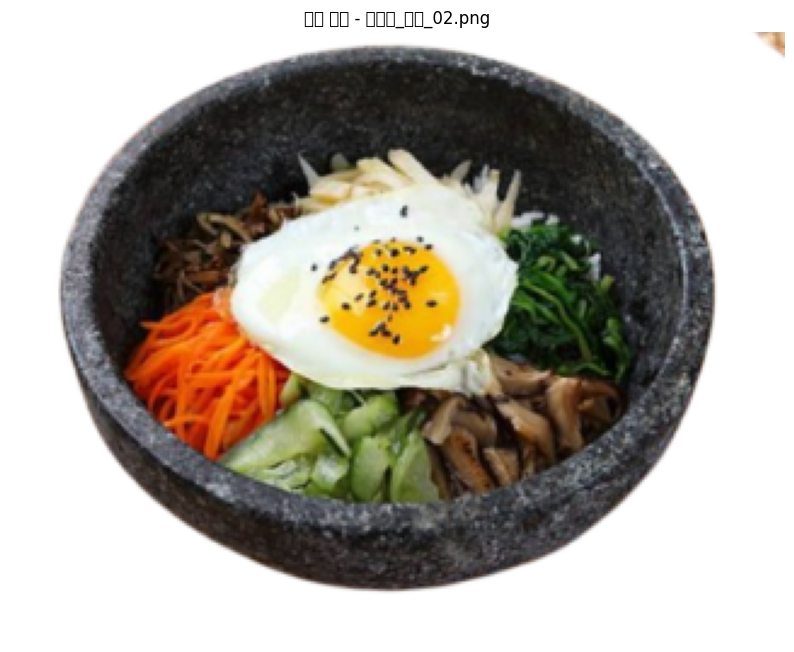

이미지 파일: 오소프_식단_01 (4).png

image 1/1 /content/오소프_식단_01 (4).png: 416x640 1 coldsoymilknoodles, 10.8ms
Speed: 3.4ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)
탐지된 음식 종류 및 개수 : {'coldsoymilknoodles': 1}


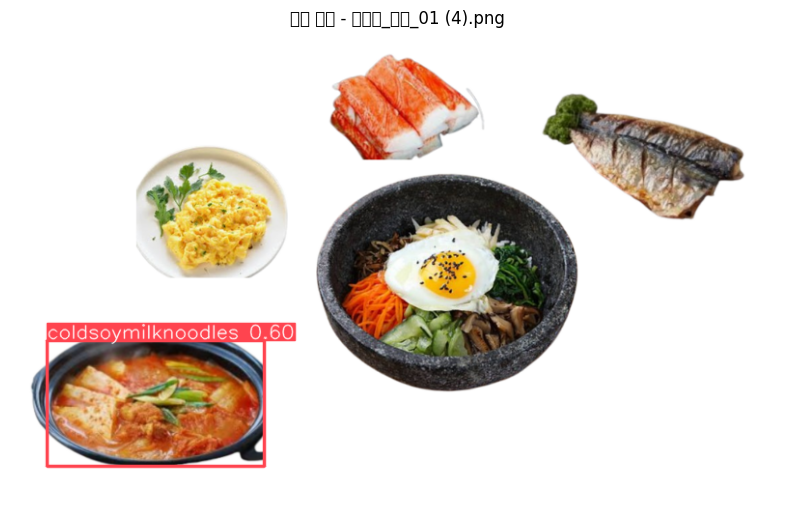

In [ ]:
from ultralytics import YOLO
from google.colab import files
import matplotlib.pyplot as plt
import cv2

# 1) 테스트 이미지 여러 장 업로드
uploaded = files.upload()

# 2) 학습된 YOLO 모델 로드
model = YOLO('runs/train/yolov11n_food/weights/best.pt')

# 3) 업로드된 모든 이미지에 대해 반복 처리
for img_path in uploaded.keys():
    print(f"이미지 파일: {img_path}")

    # 4) 예측 수행
    results = model(img_path)

    # 5) 탐지된 음식 종류 및 개수 출력
    detected = {}
    for result in results:
        boxes = result.boxes
        class_ids = boxes.cls.cpu().numpy().astype(int)
        for cid in class_ids:
            cname = model.names[cid]
            detected[cname] = detected.get(cname, 0) + 1

    print("탐지된 음식 종류 및 개수 :", detected)

    # 6) 이미지 시각화
    annotated_img = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # 7) 출력
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f'탐지 결과 - {img_path}')
    plt.show()